In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Load the data from the CSV file
df = pd.read_csv("sales_data.csv")

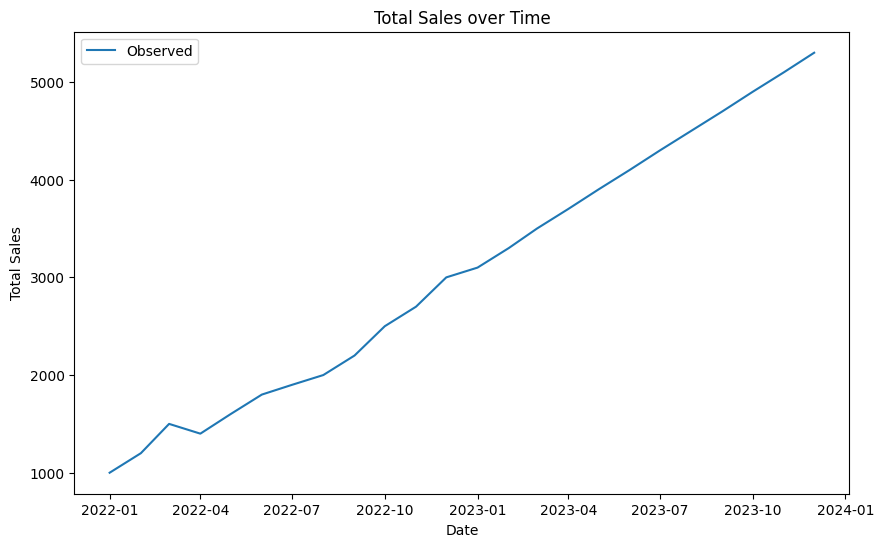

In [44]:
# Preprocess the data
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df["Total Sales"] = pd.to_numeric(df["Total Sales"])


# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Total Sales"], label="Observed")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales over Time")
plt.legend()
plt.show()

c:\Users\Aether\Documents\GitHub\New folder\New folder\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aether\Documents\GitHub\New folder\New folder\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aether\Documents\GitHub\New folder\New folder\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                        Total Sales   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -67.382
Date:                            Fri, 23 Feb 2024   AIC                            144.763
Time:                                    14:37:54   BIC                            146.753
Sample:                                01-01-2022   HQIC                           143.509
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1708      5.952     -0.029      0.977     -11.836      11.494
ma.L1          0.0242      6.073   

c:\Users\Aether\Documents\GitHub\New folder\New folder\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


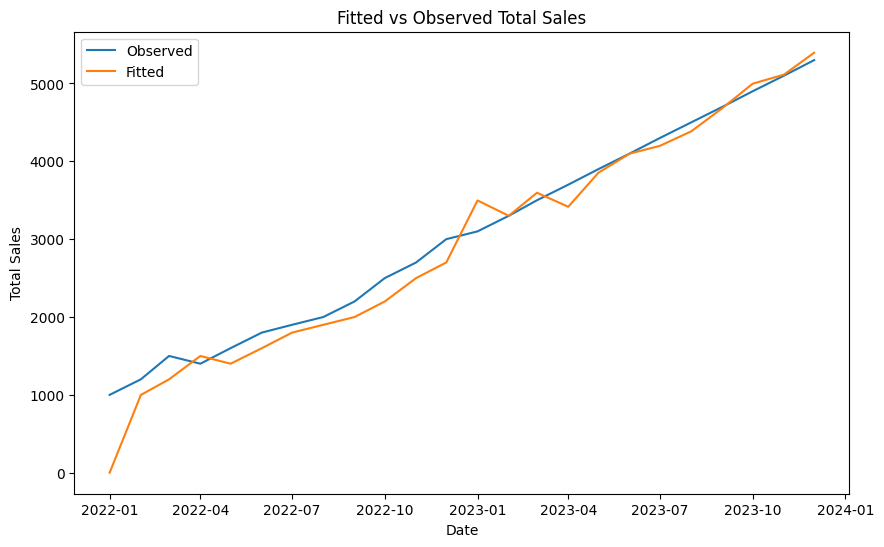

In [45]:
# Fit a SARIMA model to the data
model = SARIMAX(df["Total Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Print the summary of the fitted model
print(results.summary())

# Plot the fitted values and the observed values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Total Sales"], label="Observed")
plt.plot(df.index, results.fittedvalues, label="Fitted")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Fitted vs Observed Total Sales")
plt.legend()
plt.show()